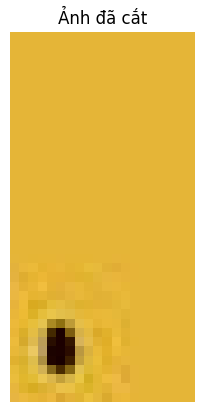

In [59]:
import cv2
import matplotlib.pyplot as plt

image_path = "/content/rabbit.jpeg"
image = cv2.imread(image_path)

x, y, w, h = 179, 295, 20, 40
template_image = image[y:y+h, x:x+w]

plt.imshow(cv2.cvtColor(template_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Ảnh đã cắt")
plt.show()


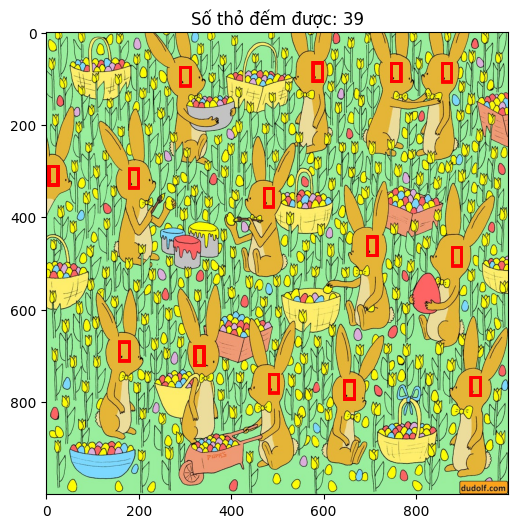

In [76]:
def template_matching(image_path, x, y, w, h, threshold=0.8):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    template = gray_image[y:y+h, x:x+w]

    result = cv2.matchTemplate(gray_image, template, cv2.TM_CCOEFF_NORMED)

    # Tìm vị trí có độ tương đồng cao hơn threshold
    loc = np.where(result >= threshold)

    boxes = [(pt[0], pt[1], w, h) for pt in zip(*loc[::-1])]
    count = len(loc[0])

    # Visualize
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title(f'Số thỏ đếm được: {count}')

    for (x, y, w, h) in boxes:
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()
    return count

image_path = '/content/rabbit.jpeg'
x, y, w, h = 179, 295, 20, 40
count = template_matching(image_path, x, y, w, h)


# Áp dụng Non Maximum Suppression để loại bỏ các box trùng nhau
Source: https://viblo.asia/p/tim-hieu-va-trien-khai-thuat-toan-non-maximum-suppression-bJzKmr66Z9N

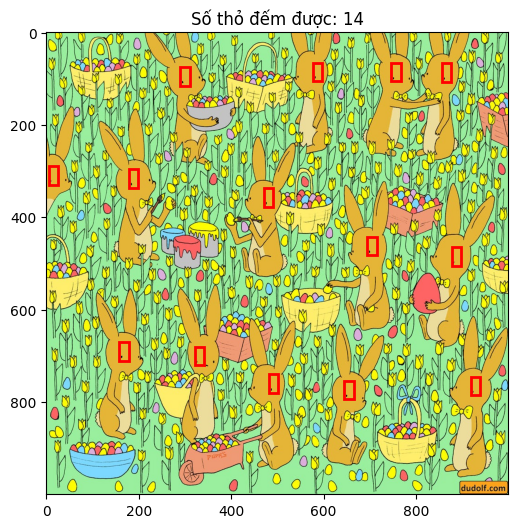

In [77]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def non_max_suppression(boxes, overlapThresh=0.5):
    if len(boxes) == 0:
        return []

    boxes = np.array(boxes)
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = x1 + boxes[:, 2]
    y2 = y1 + boxes[:, 3]

    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    pick = []
    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        overlap = (w * h) / area[idxs[:last]]

        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))

    return boxes[pick].tolist()

def template_matching(image_path, x, y, w, h, threshold=0.8):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    template = gray_image[y:y+h, x:x+w]

    result = cv2.matchTemplate(gray_image, template, cv2.TM_CCOEFF_NORMED)

    # Tìm vị trí có độ tương đồng cao hơn threshold
    loc = np.where(result >= threshold)

    boxes = [(pt[0], pt[1], w, h) for pt in zip(*loc[::-1])]
    filtered_boxes = non_max_suppression(boxes, overlapThresh=0.3)
    count = len(filtered_boxes)

    # Visualize
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title(f'Số thỏ đếm được: {count}')

    for (x, y, w, h) in filtered_boxes:
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()
    return count

image_path = '/content/rabbit.jpeg'
x, y, w, h = 179, 295, 20, 40
count = template_matching(image_path, x, y, w, h)
